# About Dataset
## Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

## Content
price price in US dollars 326--18,823

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X_train = pd.read_csv("dataset_folder/train.csv")
X_sub = pd.read_csv("dataset_folder/test.csv")

In [153]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


# Correlation Matrix

In [154]:
X_train.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


As you can see there a strong correlation between price and carat, x, y, z

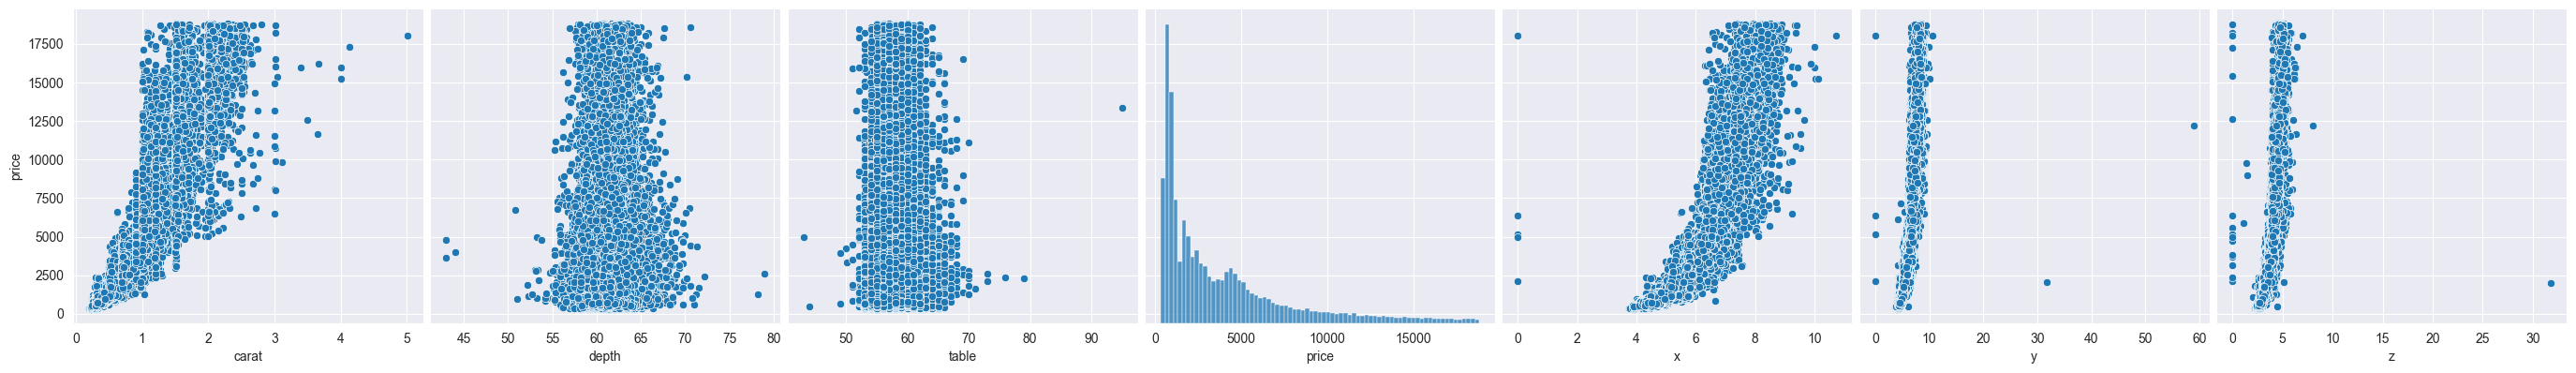

In [155]:
sns.pairplot(data=X_train, y_vars='price', diag_kind='hist', height=(4))

# Carat Feature

## some outliers
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),

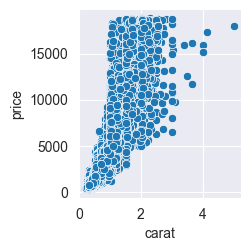

In [70]:
sns.pairplot(data=X_train, y_vars='price', x_vars='carat')

In [71]:
X_train[X_train['carat'] >= 3].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
39490,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77
23004,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
22788,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97
20984,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
35076,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
8689,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
9927,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33
26229,3.00,Good,E,I1,64.2,65.0,11548,9.08,8.96,5.79
16302,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
12566,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


If you look at the previous data you will notice some unlogical data (look at the first two rows) 

# Depth Feature

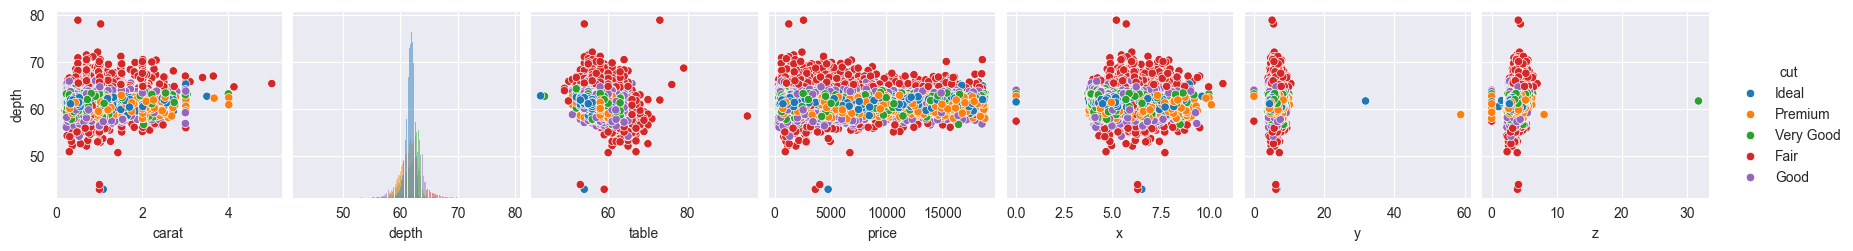

In [72]:
sns.pairplot(data=X_train, hue='cut', y_vars='depth', diag_kind='hist')

As you can see the depth column don't affect the price and have almost a zero correlation so we can delete this column 

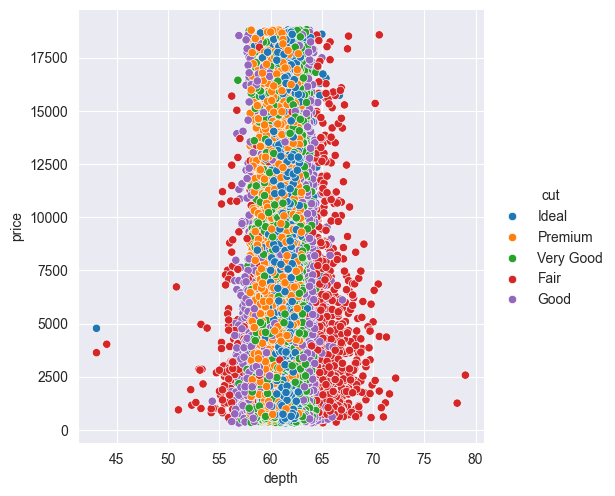

In [77]:
sns.pairplot(data=X_train, hue='cut', y_vars='price', x_vars='depth', height=5)

In [78]:
X_train[(X_train['depth'] >= 75) | (X_train['depth'] <= 50)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
27567,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
40895,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
29942,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
39393,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
3476,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12


# Table Feature

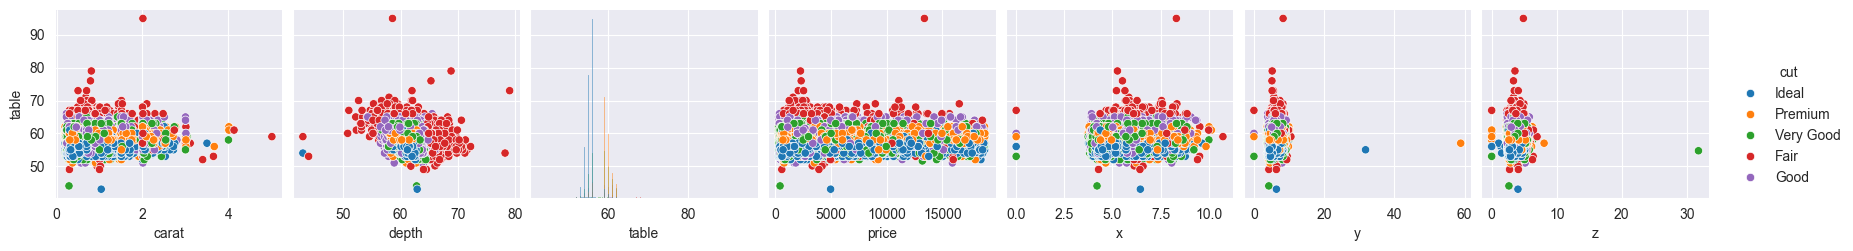

In [73]:
sns.pairplot(data=X_train, hue='cut', y_vars='table', diag_kind='hist')

the table feature doesn't affect the price and it depends on the cut feature so we can delete it

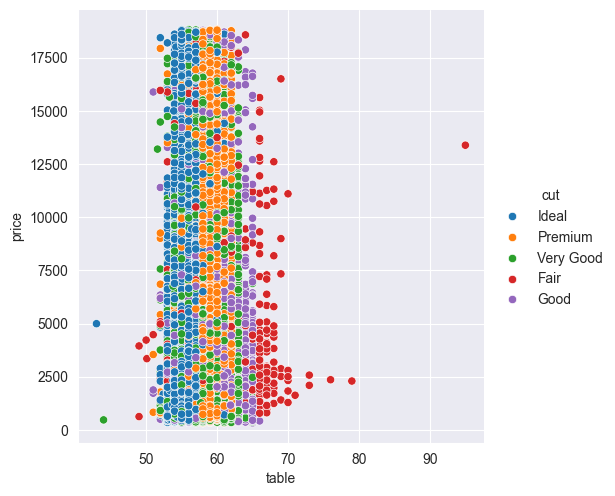

In [79]:
sns.pairplot(data=X_train, hue='cut', y_vars='price', x_vars='table', height=5)

In [81]:
X_train[(X_train['table'] > 70) | (X_train['table'] < 50)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
26907,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65
11343,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
5236,0.68,Fair,G,SI1,58.0,71.0,1633,5.85,5.70,3.35
29649,0.70,Fair,H,VS1,62.0,73.0,2100,5.65,5.54,3.47
21722,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58
15487,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
40895,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
42813,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
37011,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
32829,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


# X, Y, Z Features

## X Feature

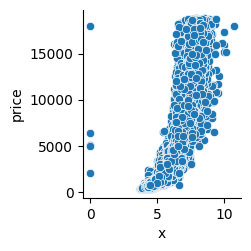

In [13]:
sns.pairplot(data=X_train, y_vars='price', x_vars='x')

In [14]:
X_train[X_train['x'] < 3].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24901,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0


You will have to remove zero x

In [ ]:
feature_name = 'x'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'x', lower_bound=4)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='x', diag_kind='hist')


## Y Feature

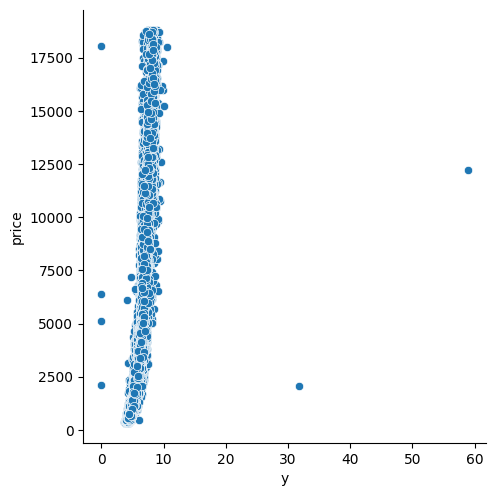

In [15]:
sns.pairplot(data=X_train, y_vars='price', x_vars='y', height=5)

In [16]:
X_train[(X_train['y'] < 0.5) | (X_train['y'] > 20)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
40663,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.0,0.00
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.0,0.00
1221,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.0,0.00
35359,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
24901,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.0,0.00


Notice the y>20 or y<0.5 they are unlogical in prices

Q1: 4.72 Q2: 5.71 Q3: 6.54


<Axes: ylabel='y'>

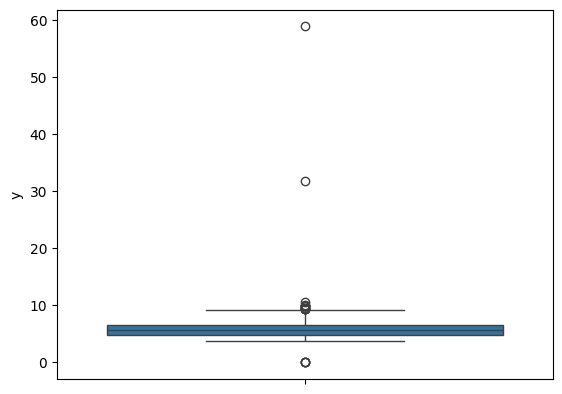

In [17]:
feature_name = 'y'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'y', lower_bound=4)

In [ ]:
sns.pairplot(data=X_train_filtered, hue='cut', y_vars='y', diag_kind='hist')

## Z Feature

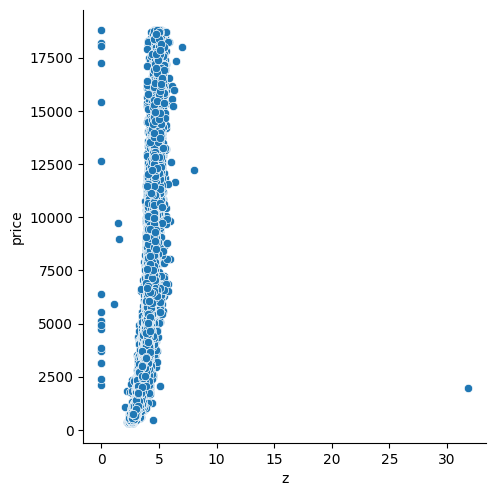

In [18]:
sns.pairplot(data=X_train, y_vars='price', x_vars='z', height=5)

In [19]:
X_train[(X_train['z'] < 1.55) | (X_train['z'] > 6)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z
10541,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
27221,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.00
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
34065,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00


Q1: 2.91 Q2: 3.53 Q3: 4.04


<Axes: ylabel='z'>

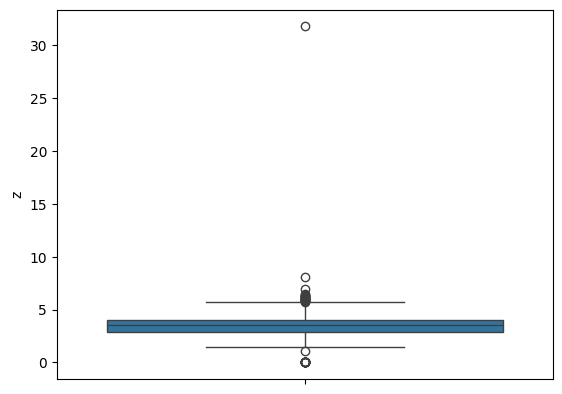

In [20]:
feature_name = 'z'
Q1 = X_train[feature_name].quantile(0.25)
Q2 = X_train[feature_name].quantile(0.50)
Q3 = X_train[feature_name].quantile(0.75)
print("Q1:", Q1, "Q2:", Q2, "Q3:", Q3)
sns.boxplot(data=X_train, y=feature_name)

In [ ]:
X_train_filtered = winsorize(X_train.copy(), 'z', lower_bound=2)

In [ ]:
sns.pairplot(data=X_train, y_vars='price', x_vars='z', height=5)

## Extra Volume Feature

In [44]:
X_train_filtered = X_train.copy()
X_train_filtered['volume'] = X_train_filtered['x'] * X_train_filtered['y'] * X_train_filtered['z']

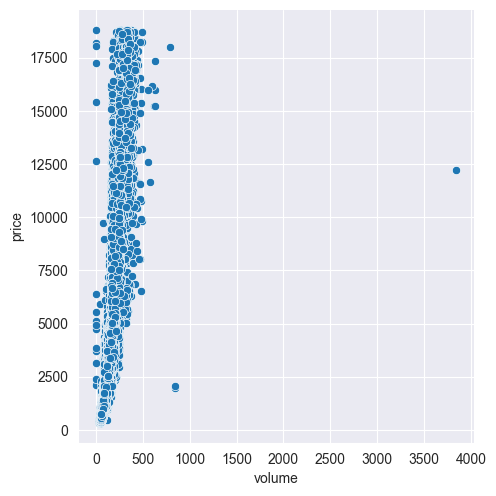

In [45]:
sns.pairplot(data=X_train_filtered, y_vars='price', x_vars='volume', height=5)

In [46]:
X_train_filtered["volume"] = X_train_filtered["volume"].apply(np.log1p)

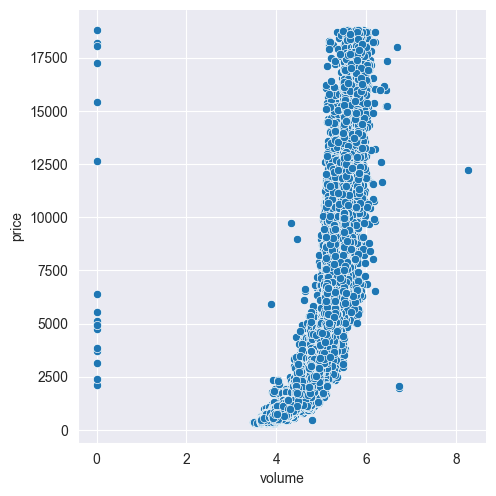

In [47]:
sns.pairplot(data=X_train_filtered, y_vars='price', x_vars='volume', height=5)

In [53]:
X_train_filtered[(X_train_filtered["volume"] < 2)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0,0.0
27221,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.0,0.0
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,0.0
34065,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0.0
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,0.0
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,0.0
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0.0
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,0.0
22171,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,0.0
21061,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,0.0


As you can see there when volume <2 

## Extra hypo Feature

In [115]:
X_train_filtered = X_train.copy()
xy_mean = X_train_filtered[['x','y']].mean(axis=1)
base = 0.5*(X_train_filtered['table']/100)*xy_mean
height = X_train_filtered['z']
X_train_filtered['hypo'] = np.sqrt(base**2 + height**2)

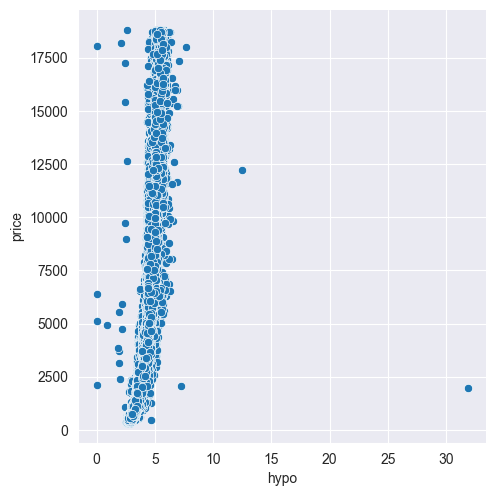

In [116]:
sns.pairplot(data=X_train_filtered, y_vars='price', x_vars='hypo', height=5)


In [117]:
X_train_filtered["hypo"] = X_train_filtered["hypo"].apply(np.log1p)


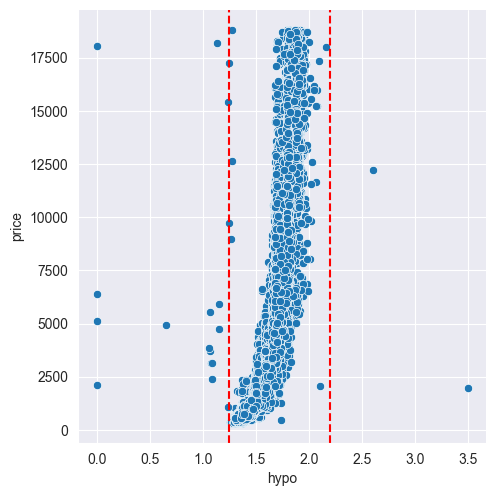

In [129]:
pairplot = sns.pairplot(data=X_train_filtered, y_vars='price', x_vars='hypo', height=5)
for ax in pairplot.axes.flatten():
    ax.axvline(x=1.25, color='r', linestyle='--')
    ax.axvline(x=2.2, color='r', linestyle='--')


In [130]:
X_train_filtered[(X_train_filtered["hypo"] < 1.25) | (X_train_filtered["hypo"] > 2.2)].sort_values(by='price')

,carat,cut,color,clarity,depth,table,price,x,y,z,hypo
38259,0.38,Ideal,E,VVS2,60.9,56.0,1068,4.71,4.68,2.06,1.236553
10541,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,3.491373
6765,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00,0.000000
27221,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.00,1.089757
16971,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00,1.072243
34065,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00,1.083786
571,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00,1.069209
14265,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00,1.058016
4980,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00,1.151829
39201,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,0.655861


# Dropping outliers and add volume, hypo features


In [180]:
def convert_1(df):   
    x_train_filtered = df.copy()
    x_train_filtered.drop("Id", axis=1, inplace=True)
    x_train_filtered['volume'] = x_train_filtered['x'] * x_train_filtered['y'] * x_train_filtered['z']
    x_train_filtered["volume"] = x_train_filtered["volume"].apply(np.log1p)
    
    xy_mean = x_train_filtered[['x','y']].mean(axis=1)
    base = 0.5*(x_train_filtered['table']/100)*xy_mean
    height = x_train_filtered['z']
    x_train_filtered['hypo'] = np.sqrt(base**2 + height**2)
    return x_train_filtered

def convert_2(x_train_filtered):
    x_train_filtered = x_train_filtered[x_train_filtered['x'] >= 3 ]
    x_train_filtered = x_train_filtered[(x_train_filtered['y'] >= 0.5) & (x_train_filtered['y'] <= 20)]
    x_train_filtered = x_train_filtered[(x_train_filtered['z'] >= 1.55) & (x_train_filtered['z'] <= 6)]
    x_train_filtered =  x_train_filtered[(x_train_filtered["volume"] > 2)]
    x_train_filtered = x_train_filtered[x_train_filtered['carat'] < 3]
    x_train_filtered = x_train_filtered[(x_train_filtered['depth'] < 75) | (x_train_filtered['depth'] > 50)]
    x_train_filtered = x_train_filtered[(x_train_filtered['table'] <= 70) | (x_train_filtered['table'] >= 50)]
    x_train_filtered = x_train_filtered[(x_train_filtered["hypo"] >= 1.25) | (x_train_filtered["hypo"] <= 2.2)]
    return x_train_filtered

X_train_filtered = convert_1(X_train)
X_train_filtered = convert_2(X_train_filtered)

# sns.pairplot(data=X_train_filtered, hue='cut', diag_kind='hist')


# removing Outliers automatically
# X_train_filtered = X_train.copy()
# X_train_filtered = X_train.select_dtypes(include=np.number).copy()
# from sklearn.ensemble import IsolationForest
# isolation_forest = IsolationForest(random_state=42)
# outlier_pred = isolation_forest.fit_predict(X_train_filtered)
# X_train_filtered = X_train_filtered.iloc[outlier_pred == 1]
# sns.pairplot(data=X_train_filtered, diag_kind='hist')

In [181]:
X_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43101 entries, 0 to 43151
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43101 non-null  float64
 1   cut      43101 non-null  object 
 2   color    43101 non-null  object 
 3   clarity  43101 non-null  object 
 4   depth    43101 non-null  float64
 5   table    43101 non-null  float64
 6   price    43101 non-null  int64  
 7   x        43101 non-null  float64
 8   y        43101 non-null  float64
 9   z        43101 non-null  float64
 10  volume   43101 non-null  float64
 11  hypo     43101 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.3+ MB


In [182]:
X_train_filtered

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,hypo
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,5.178877,4.481852
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,5.513291,4.994539
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,3.987935,2.979220
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,4.470757,3.507152
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,4.756304,3.863440
...,...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18,4.454319,3.493987
43148,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55,4.761717,3.929993
43149,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02,4.301381,3.338846
43150,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65,3.959269,2.941833


# Pipeline

In [174]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline

preprocessing = ColumnTransformer([
        ("cut_cat", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]), ['cut']),
        ("color_cat", OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]), ['color']),
        ("clarity_cat", OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]), ['clarity']),
    ],
    remainder=StandardScaler()
    # remainder='passthrough'
) 

# Model

In [183]:
from sklearn.model_selection import train_test_split
X_train_filtered = convert_1(X_train)
X_train_filtered = convert_2(X_train_filtered)
X_train, X_test, y_train, y_test = train_test_split(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'], test_size=0.2, random_state=42)    
pd.DataFrame(preprocessing.fit_transform(X_train), columns=preprocessing.get_feature_names_out())

,cut_cat__cut,color_cat__color,clarity_cat__clarity,remainder__carat,remainder__depth,remainder__table,remainder__x,remainder__y,remainder__z,remainder__volume,remainder__hypo
0,4.0,2.0,2.0,-0.801987,-0.028354,-1.100403,-0.797875,-0.795780,-0.795586,-0.777304,-0.825987
1,2.0,2.0,2.0,1.498657,0.806110,-0.206881,1.351793,1.396303,1.496910,1.359828,1.455395
2,4.0,4.0,5.0,-0.887196,-0.654202,-1.993925,-0.905358,-0.876968,-0.955190,-0.917317,-0.997989
3,4.0,3.0,3.0,0.476149,0.458417,-0.206881,0.662108,0.566379,0.669870,0.697853,0.645845
4,4.0,4.0,2.0,-1.100218,-0.793279,-1.100403,-1.317378,-1.291930,-1.361455,-1.443274,-1.374916
...,...,...,...,...,...,...,...,...,...,...,...
34475,4.0,3.0,2.0,0.646567,0.388878,-0.653642,0.814376,0.764839,0.843984,0.853336,0.801064
34476,1.0,3.0,4.0,0.859589,1.292881,0.239880,0.769591,0.746797,0.931041,0.860035,0.902800
34477,3.0,2.0,2.0,-1.036312,-2.114514,1.133402,-1.129282,-1.174658,-1.346946,-1.303266,-1.273348
34478,2.0,5.0,3.0,-0.013803,0.667033,-0.653642,0.106777,0.133375,0.205567,0.242195,0.163919


In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

clf=make_pipeline(preprocessing, RandomForestRegressor(max_depth=60, max_features=4, n_estimators=960))
clf_rmses = -cross_val_score(clf, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=3)

pd.Series(clf_rmses).describe()

count      3.000000
mean     568.032997
std        6.838370
min      561.390212
25%      564.523762
50%      567.657312
75%      571.354389
max      575.051465
dtype: float64

In [185]:
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cut_cat',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal']]),
                                                  ['cut']),
                                                 ('color_cat',
                                                  OrdinalEncoder(categories=[['J',
                                                                              'I',
                                                                              'H',
                                                                              'G',
                                                                              'F',
                                                                              'E',
                                                                              'D']]),
                                                  ['color']),
                                                 ('clarity_cat',
                                                  OrdinalEncoder(categories=[['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]),
                                                  ['clarity'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=60, max_features=4,
                                       n_estimators=960))])

In [186]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = clf.predict(X_train)

print(r2_score(y_train, y_pred), np.sqrt(mean_squared_error(y_train, y_pred)))

0.9974390717711377 201.4946720680104


In [187]:
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

0.9808172212057131 546.6806825045824


In [188]:
feature_importances = clf['randomforestregressor'].feature_importances_
sorted(zip(feature_importances,
           clf["columntransformer"].get_feature_names_out()),
           reverse=True)

[(0.302468107511279, 'remainder__volume'),
 (0.21482571844384657, 'remainder__y'),
 (0.18984110035088939, 'remainder__carat'),
 (0.08539477674110002, 'remainder__x'),
 (0.08150266458737448, 'remainder__hypo'),
 (0.05900962138063834, 'clarity_cat__clarity'),
 (0.030847595348082107, 'color_cat__color'),
 (0.026927273843509354, 'remainder__z'),
 (0.003985304017521682, 'remainder__depth'),
 (0.0026668856771032896, 'cut_cat__cut'),
 (0.0025309520986559193, 'remainder__table')]

# Feature selection on importance and train again

In [201]:
from sklearn.feature_selection import SelectFromModel

for threshold in [0.0001, 0.00253, 0.00266, 0.00398, 0.02692, 0.03084, 0.059, 0.08150]:
    # Create a SelectFromModel instance
    selector = SelectFromModel(RandomForestRegressor(max_depth=60, max_features=4, n_estimators=960), threshold=threshold)  # Features with importance greater than the mean importance will be selected
    clf=make_pipeline(preprocessing, selector, RandomForestRegressor())
    
    # Fit the data
    clf.fit(X_train, y_train)
    
    # # # # Transform the data to select the most important features
    # # # X_selected = clf.transform(X_train)
    
    y_pred = clf.predict(X_train)
    print(r2_score(y_train, y_pred), np.sqrt(mean_squared_error(y_train, y_pred)))
    y_pred = clf.predict(X_test)
    print(r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))
    print(20*"++")

0.9973884405703389 203.4767629474883
0.9807648721840085 547.4261089451767
++++++++++++++++++++++++++++++++++++++++
0.9974032574774173 202.89872042862484
0.9806449238589031 549.1303033940895
++++++++++++++++++++++++++++++++++++++++
0.997406470860568 202.7731413322788
0.9809358242798261 544.9880564999079
++++++++++++++++++++++++++++++++++++++++
0.997356795667286 204.70583970398488
0.9801293309777976 556.3962744179319
++++++++++++++++++++++++++++++++++++++++
0.9972931091132299 207.15729824790654
0.9800664486449249 557.2759594255806
++++++++++++++++++++++++++++++++++++++++
0.997317869607645 206.2076661736788
0.9802942930986288 554.0819185774703
++++++++++++++++++++++++++++++++++++++++
0.982332856305915 529.2343617522557
0.8843213796955157 1342.469781401317
++++++++++++++++++++++++++++++++++++++++
0.9795704577605604 569.1073324087856
0.87227586291484 1410.6343569642904
++++++++++++++++++++++++++++++++++++++++


In [ ]:
clf.get_params

# Train on the overall training data

In [202]:
selector = SelectFromModel(RandomForestRegressor(max_depth=60, max_features=4, n_estimators=960), threshold=0.00266)  # Features with importance greater than the mean importance will be selected
clf=make_pipeline(preprocessing, selector, RandomForestRegressor())

clf.fit(X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'])

# # Transform the data to select the most important features
# X_selected = clf.transform(X_train)

y_pred = clf.predict(X_train_filtered.drop(['price'], axis=1))

print(r2_score(X_train_filtered['price'], y_pred), np.sqrt(mean_squared_error(X_train_filtered['price'], y_pred)))

0.997383886570005 203.30334472139214


In [203]:
clf_rmses = -cross_val_score(clf, X_train_filtered.drop(['price'], axis=1), X_train_filtered['price'],
                                scoring="neg_root_mean_squared_error", cv=3)

pd.Series(clf_rmses).describe()

count      3.000000
mean     553.018876
std        9.635810
min      545.167131
25%      547.642312
50%      550.117493
75%      556.944748
max      563.772003
dtype: float64

# Submit

In [204]:
pred = clf.predict(convert_1(X_sub))

submit = pd.DataFrame(data={"Id": X_sub["Id"].astype(np.int64), "price": pred})
submit.info()
submit.to_csv("submission.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      10788 non-null  int64  
 1   price   10788 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 168.7 KB
